In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('tennisplay.csv',sep='\t')

In [4]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
windy       14 non-null bool
play        14 non-null object
dtypes: bool(1), object(4)
memory usage: 278.0+ bytes


In [6]:
data['play'],play_names=pd.factorize(data['play'])

In [7]:
print(play_names)
print(data['play'].unique())

Index(['no', 'yes'], dtype='object')
[0 1]


In [8]:
data['outlook'],outname=pd.factorize(data['outlook'])
data['temp'],tempname=pd.factorize(data['temp'])
data['humidity'],huminames=pd.factorize(data['humidity'])
data['windy'],windname=pd.factorize(data['windy'])

In [9]:
data

,outlook,temp,humidity,windy,play
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [10]:
X=data.values[:,0:4]
y=data.values[:,4]

In [11]:
X

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [2, 1, 0, 0],
       [2, 2, 1, 0],
       [2, 2, 1, 1],
       [1, 2, 1, 1],
       [0, 1, 0, 0],
       [0, 2, 1, 0],
       [2, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 0],
       [2, 1, 0, 1]], dtype=int32)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
data.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [14]:
clf = DecisionTreeClassifier(criterion='entropy')

In [15]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
y_pred_entropy=clf.predict(X_test)
y_pred_entropy

array([1, 0, 0, 1, 1], dtype=int32)

In [17]:
print(accuracy_score(y_test,y_pred_entropy)*100)

60.0


In [18]:
print(recall_score(y_test,y_pred_entropy)*100)

66.6666666667


In [19]:
print(precision_score(y_test,y_pred_entropy)*100)

66.6666666667


In [20]:
print(confusion_matrix(y_test,y_pred_entropy))

[[1 1]
 [1 2]]


In [27]:
print(classification_report(y_test,y_pred_entropy))

             precision    recall  f1-score   support

          0       0.50      0.50      0.50         2
          1       0.67      0.67      0.67         3

avg / total       0.60      0.60      0.60         5



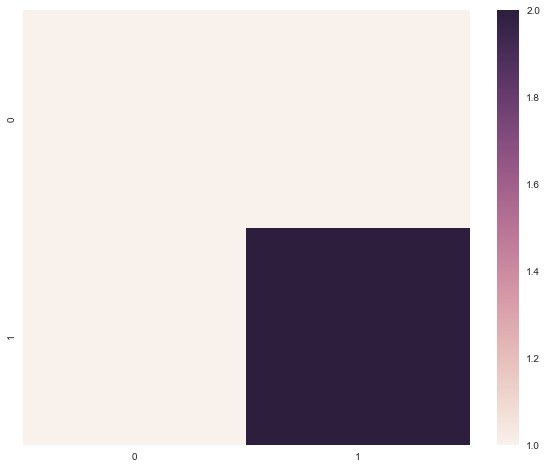

In [26]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test,y_pred_entropy)
label=['0','1']
sns.heatmap(cm,xticklabels=label,yticklabels=label)
plt.show()

In [28]:
import graphviz as gp
feature_name = X = data.values[:,0:4]
dot_data = tree.export_

ModuleNotFoundError: No module named 'graphviz'